In [162]:
import pandas as pd
import numpy as np

#Iris Dataset

### **Task 1 — Load & Inspect the Dataset**
1. Load the Iris dataset.  
2. Display the first 7 rows.  
3. Show the shape, column names, and data types.


In [163]:
# load the Iris dataset
import seaborn as sns

img = sns.load_dataset("iris")

print(img.head(7))
print(img.shape)
print(img.columns.tolist())
print(img.dtypes)


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
(150, 5)
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [164]:
# solution
# shape, column names, data types
img.shape, img.columns, img.dtypes

((150, 5),
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species'],
       dtype='object'),
 sepal_length    float64
 sepal_width     float64
 petal_length    float64
 petal_width     float64
 species          object
 dtype: object)

### **Task 2 — Basic Cleaning**
1. Check for missing values.  
2. Count unique species.  
3. Verify that all numeric values are positive.


In [165]:
# check for missing values
print(img.isnull().values.any().sum())

0


In [166]:
# count unique species
print(img.groupby('species').nunique())

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa                15           16             9            6
versicolor            21           14            19            9
virginica             21           13            20           12


In [167]:
# verify that all numeric values are positive
print((img.select_dtypes(include="number") < 0).values.any())

False


### **Task 3 — Filtering**
1. Select rows where **sepal_length > 6.0**.  
2. Select Setosa flowers with **petal_width < 0.3**.  
3. Count rows where **sepal_width > 3.5**.


In [168]:
# select rows where sepal_length > 6.0
print(img.loc[img['sepal_length'] > 6.0])

     sepal_length  sepal_width  petal_length  petal_width     species
50            7.0          3.2           4.7          1.4  versicolor
51            6.4          3.2           4.5          1.5  versicolor
52            6.9          3.1           4.9          1.5  versicolor
..            ...          ...           ...          ...         ...
146           6.3          2.5           5.0          1.9   virginica
147           6.5          3.0           5.2          2.0   virginica
148           6.2          3.4           5.4          2.3   virginica

[61 rows x 5 columns]


In [169]:
# select Setosa flowers with petal_width < 0.3
print(img[(img['petal_width'] < 0.3) & (img['species'] == 'setosa')])

    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
..           ...          ...           ...          ...     ...
47           4.6          3.2           1.4          0.2  setosa
48           5.3          3.7           1.5          0.2  setosa
49           5.0          3.3           1.4          0.2  setosa

[34 rows x 5 columns]


In [170]:
# count rows where sepal_width > 3.5
print(img[img['sepal_width'] > 3.5])

     sepal_length  sepal_width  petal_length  petal_width    species
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
10            5.4          3.7           1.5          0.2     setosa
..            ...          ...           ...          ...        ...
109           7.2          3.6           6.1          2.5  virginica
117           7.7          3.8           6.7          2.2  virginica
131           7.9          3.8           6.4          2.0  virginica

[19 rows x 5 columns]


### **Task 4 — Sorting & New Column**
1. Sort the dataset by **petal_length** (ascending).  
2. Create a new column `petal_ratio = petal_length / petal_width`.  
3. Display the top 5 rows with the highest `petal_ratio`.


In [171]:
# sort dataset by petal_length (ascending)
print(img.sort_values('petal_length'))


     sepal_length  sepal_width  petal_length  petal_width    species
22            4.6          3.6           1.0          0.2     setosa
13            4.3          3.0           1.1          0.1     setosa
14            5.8          4.0           1.2          0.2     setosa
..            ...          ...           ...          ...        ...
117           7.7          3.8           6.7          2.2  virginica
122           7.7          2.8           6.7          2.0  virginica
118           7.7          2.6           6.9          2.3  virginica

[150 rows x 5 columns]


In [172]:
# create new column: petal_ratio
img['petal_ratio'] = (img['petal_length'] / img['petal_width'])

In [173]:

# show top 5 rows with highest petal_ratio
print(img.sort_values(['petal_ratio'], ascending=False).head(5))

    sepal_length  sepal_width  petal_length  petal_width species  petal_ratio
32           5.2          4.1           1.5          0.1  setosa         15.0
9            4.9          3.1           1.5          0.1  setosa         15.0
37           4.9          3.6           1.4          0.1  setosa         14.0
12           4.8          3.0           1.4          0.1  setosa         14.0
13           4.3          3.0           1.1          0.1  setosa         11.0


### **Task 5 — Grouping & Aggregation**
1. Group by **species** and compute the mean of all numeric columns.  
2. Determine which species has the highest **average petal_length**.  
3. Compute the **minimum sepal_width** for each species.


In [174]:
# means of numeric columns per species
print(img.groupby('species').mean())


            sepal_length  sepal_width  petal_length  petal_width  petal_ratio
species                                                                      
setosa             5.006        3.428         1.462        0.246     6.908000
versicolor         5.936        2.770         4.260        1.326     3.242837
virginica          6.588        2.974         5.552        2.026     2.780662


In [175]:
# species with highest average petal_length
avg_petal = img.groupby('species')['petal_length'].mean()

print(avg_petal.idxmax(), avg_petal.max())


virginica 5.5520000000000005


In [176]:
# minimum sepal_width for each species
print(img.groupby('species')['sepal_width'].min())

species
setosa        2.3
versicolor    2.0
virginica     2.2
Name: sepal_width, dtype: float64


### **Task 6 — Pivot Table**
Create a pivot table:
- **index:** species  
- **values:** sepal_length  
- **aggfunc:** median  
Then write a short conclusion (1–2 sentences).

#### ℹ️ **About Pivot Tables**

A **pivot table** is a tool used to summarize, group, and analyze data.  
It allows you to reorganize a dataset by selecting:

- an **index** (categories for rows),
- optional **columns** (categories for columns),
- **values** (the data to aggregate),
- an **aggregation function** such as mean, median, sum, or count.

Pivot tables are helpful for quickly comparing groups and extracting insights.

In this task, we compute the **median sepal length for each species**, which helps us understand how the typical sepal length varies across different species


In [177]:
# pivot table with median sepal_length per species
print(img.pivot_table(index='species', aggfunc={'sepal_length': np.median}))

            sepal_length
species                 
setosa               5.0
versicolor           5.9
virginica            6.5


/var/folders/gr/rf1yb1r12056l5tfpgkcm87r0000gn/T/ipykernel_39174/2618676270.py:2: FutureWarning: The provided callable <function median at 0x106550220> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(img.pivot_table(index='species', aggfunc={'sepal_length': np.median}))


### **Task 7 — Outlier Detection (Sepal Length)**
1. Compute Q1, Q3, and IQR.  
2. Identify outliers using the **1.5 × IQR rule**.  
3. Count the number of outliers.  
4. Display all outlier rows.

#### ℹ️ **About Q1, Q3 and IQR**

**Q1 (First Quartile)** — the value below which 25% of the data fall.  
**Q3 (Third Quartile)** — the value below which 75% of the data fall.

They help describe the spread and distribution of the dataset.

**IQR (Interquartile Range)** — the range of the middle 50% of the data:

\[
IQR = Q3 - Q1
\]

It measures how spread out the central half of the data is and is commonly used for detecting outliers.

**1.5 × IQR rule for outliers:**
- Values **below Q1 − 1.5 × IQR** are considered outliers.  
- Values **above Q3 + 1.5 × IQR** are considered outliers.

This is a standard statistical method for identifying unusually low or high observations.


In [178]:
# compute quartiles and IQR
Q1 = img['sepal_length'].quantile(0.25)
Q3 = img['sepal_length'].quantile(0.75)
IQR = Q3 - Q1

# filter outliers using 1.5 × IQR rule
outliers = img[
    (img["sepal_length"] < Q1 - 1.5 * IQR) |
    (img["sepal_length"] > Q3 + 1.5 * IQR)
]


In [179]:
# count outliers
len(outliers)

0

### **Task 8 — Vectorized Transformations**
1. Normalize `sepal_length` using the formula  
   *(x – min) / (max – min)* and store in a new column.  
2. Create a column `"species_upper"` with uppercase species names.


In [180]:
# display outlier rows
print(outliers, outliers.shape)
outliers

Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species, petal_ratio]
Index: [] (0, 6)


,sepal_length,sepal_width,petal_length,petal_width,species,petal_ratio


In [181]:
# Solution

# normalize sepal_length
img["sepal_length_norm"] = (
    (img["sepal_length"] - img["sepal_length"].min()) /
    (img["sepal_length"].max() - img["sepal_length"].min())
)

# species names in uppercase
img["species_upper"] = img["species"].str.upper()

img[["sepal_length", "sepal_length_norm", "species", "species_upper"]].head()


,sepal_length,sepal_length_norm,species,species_upper
0,5.1,0.222222,setosa,SETOSA
1,4.9,0.166667,setosa,SETOSA
2,4.7,0.111111,setosa,SETOSA
3,4.6,0.083333,setosa,SETOSA
4,5.0,0.194444,setosa,SETOSA


### **Task 9 — Basic Visualization**
1. Create a **scatter plot** of `sepal_length` vs `petal_length`, colored by species.  
2. Create a **histogram** of the `petal_width` column.


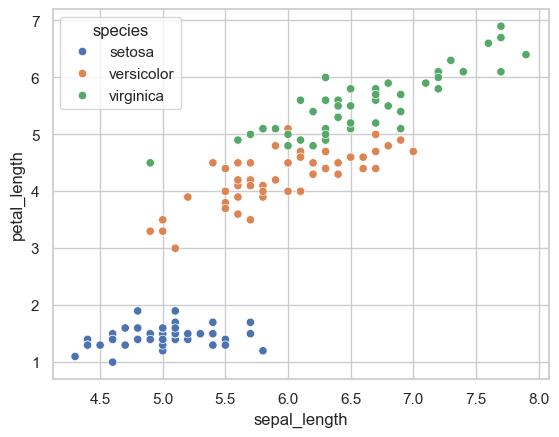

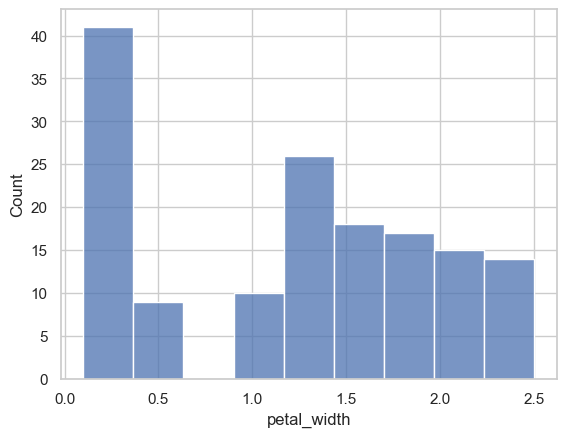

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt


# scatter plot: sepal_length vs petal_length (colored by species)
sns.set_theme(style='whitegrid')
img = sns.load_dataset('iris')

sns.scatterplot(x="sepal_length", y="petal_length", data=img, hue='species')
plt.show()

# histogram of petal_width
sns.set_theme(style='whitegrid')
img = sns.load_dataset('iris')

sns.histplot(data=img, x='petal_width')
plt.show()




### **Task 10 — More Visualization**
1. Create a **boxplot** of `petal_length` grouped by species.  
2. Create a **pairplot** showing all features colored by species.

#### ℹ️ **About Pairplot**

A **pairplot** creates a grid of plots that shows the relationships between every pair of features in the dataset.  
It includes:

- **scatter plots** for each pair of numerical features,  
- **histograms or KDE plots** on the diagonal to show individual feature distributions,  
- **color grouping (hue)** to reveal how different categories (species) are distributed.

Pairplots are extremely useful for exploring patterns, correlations, and separability between classes in the dataset.



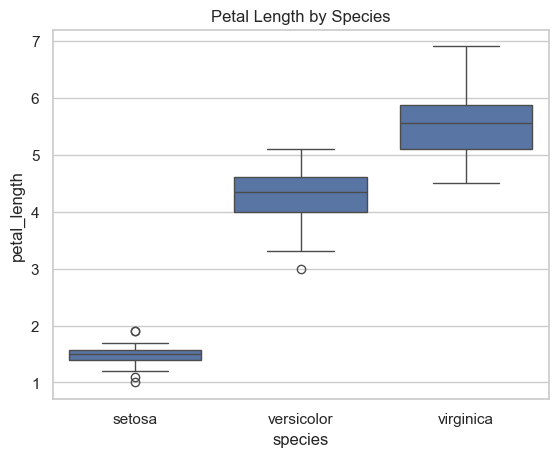

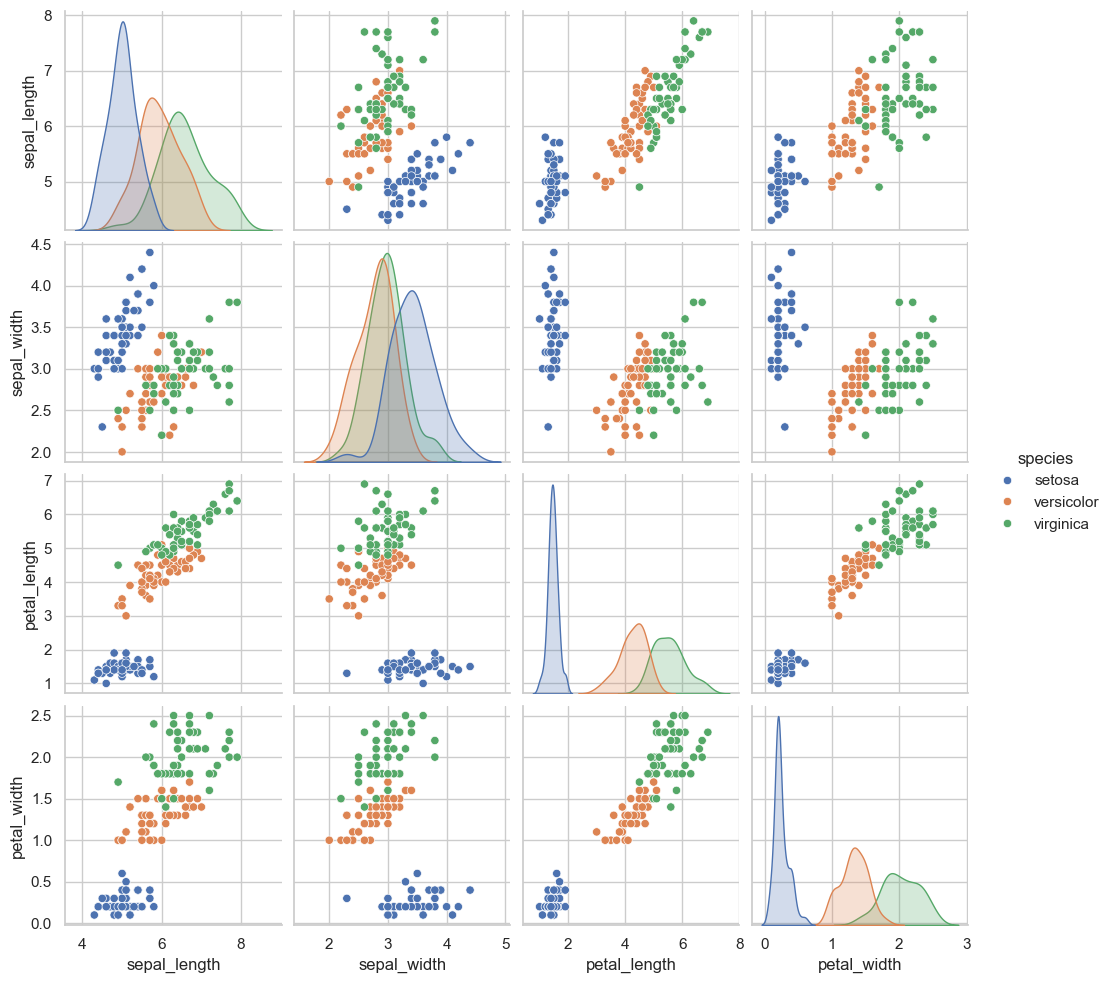

In [183]:

# boxplot grouped by species
sns.boxplot(
    data=img,
    x="species",
    y="petal_length"
)
plt.title("Petal Length by Species")
plt.show()

# pairplot of all features
sns.pairplot(img, hue="species")


#Titanic dataset part two


We are going to use the [Titanic dataset](https://github.com/datasciencedojo/datasets/blob/master/titanic.csv) again.

In [184]:
img = pd.read_csv("titanic.csv")
img.head(10)
img.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [185]:
# Display the first few rows with the new columns
display(img.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Task 11 - Counting People in Cabins
Create a new dataframe, that has each cabin and the number of persons in the cabin. You can use the value_counts() method.
Hint: This already sorts the values

In [186]:
df1 = img['Cabin'].value_counts(dropna=False)
df1

Cabin
NaN            687
C23 C25 C27      4
G6               4
              ... 
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

# Task 12 - Splitting Names
The next task will be to split the name column into first and last name. Names can look like this:
Robins, Mrs. Alexander A (Grace Charity Laury)
you can get rid of the maiden name, the part in (), with .str.replace(r'\s*\([^)]*\)', '', regex=True)

In [187]:
img['Name_clean'] = img['Name'].str.replace(r'\s*\([^)]*\)', '', regex=True)
split_cols = img['Name_clean'].str.split(",", n=1, expand=True)
img[['LastName', 'Rest']] = split_cols.reindex(columns=[0, 1])
img['LastName'] = img['LastName'].str.strip()
img['Rest'] = img['Rest'].astype("string").str.strip()

img['FirstName'] = img['Rest'].str.split().str[0]


Make a dataframe that lists each last name and how many times it occurs in the dataset

In [188]:
print(img.groupby('LastName').count())

               PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  \
LastName                                                                     
Abbing                   1         1       1     1    1    1      1      1   
Abbott                   2         2       2     2    2    2      2      2   
Abelson                  2         2       2     2    2    2      2      2   
...                    ...       ...     ...   ...  ...  ...    ...    ...   
del Carlo                1         1       1     1    1    1      1      1   
van Billiard             1         1       1     1    1    1      1      1   
van Melkebeke            1         1       1     1    1    0      1      1   

               Ticket  Fare  Cabin  Embarked  Name_clean  Rest  FirstName  
LastName                                                                   
Abbing              1     1      0         1           1     1          1  
Abbott              2     2      0         2           2     2       

# Task 13 - One-hot Encoding
Neural networks don't work well with strings. Since back in 1912 only one of two genders was recorded for each passenger, we can encode the sex column with 1 and 0.

In [189]:
img.loc[img['Sex'] == 'male', 'Sex'] = 1
img.loc[img['Sex'] == 'female', 'Sex'] = 0
img

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_clean,LastName,Rest,FirstName
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris",Braund,Mr. Owen Harris,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley",Cumings,Mrs. John Bradley,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina",Heikkinen,Miss. Laina,Miss.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,"Johnston, Miss. Catherine Helen ""Carrie""",Johnston,"Miss. Catherine Helen ""Carrie""",Miss.
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,"Behr, Mr. Karl Howell",Behr,Mr. Karl Howell,Mr.
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.7500,NaN,Q,"Dooley, Mr. Patrick",Dooley,Mr. Patrick,Mr.


# Task - 14 One-Hot Encoding Embarked
1. Use `nunique` to see how many unique values the column has
2. Use `unique()` to display the unique values
3. Replace NaN values with 'N'
4. Use pandas `get_dummies()` to one-hot encode the values. This will create a boolean column for each unique value


In [190]:
# Solution
# Display the unique values in the 'Embarked' column
img['Embark'] = img['Embarked'].fillna(value='N')
print(img['Embarked'].nunique())


3


In [191]:
#one-hot encode
img['Embark'] = img['Embarked'].fillna(value='N')
pd.get_dummies(img['Embark'], prefix='Embarked')


,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,False,False,False,True
1,True,False,False,False
2,False,False,False,True
...,...,...,...,...
888,False,False,False,True
889,True,False,False,False
890,False,False,True,False


# Train, Test and Validation Split
Complete the function below that splits a dataframe into a training, test, and validation dataset. For this you should shuffle the dataset. This can be done with `np.random.permutation(len(df))`, but you can also used a different method.

In [192]:
def split_data(df, splits=(0.7, 0.15, 0.15), seed=42):
    np.random.seed(seed)
    df_shuffled = df.sample(frac=1, random_state=seed)
    n = len(df)
    split_point_1 = int(splits[0] * n)
    split_point_2 = int((splits[0] + splits[1]) * n)

    train, validate, test = np.split(df_shuffled, [split_point_1, split_point_2])
    print(f"Split shapes: {train.shape}, {validate.shape}, {test.shape}")
    return train, validate, test
    

Split shapes: (623, 17), (134, 17), (134, 17)


/opt/homebrew/Caskroom/miniforge/base/envs/ai/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


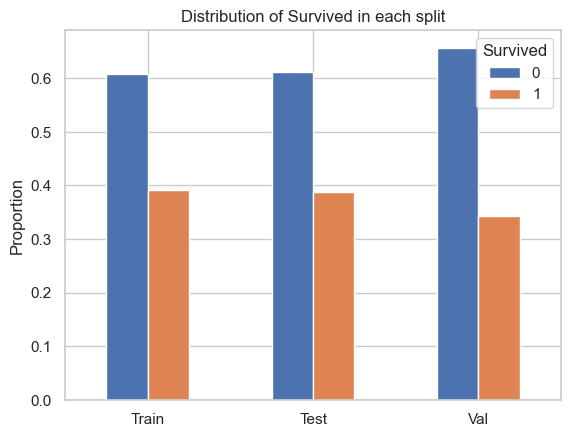

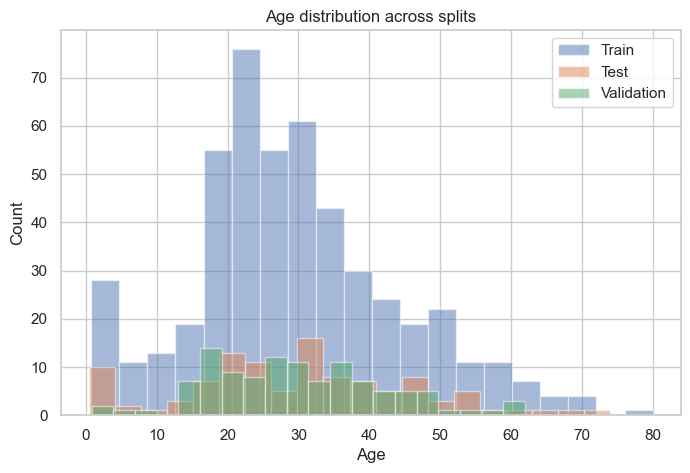

In [193]:
# This can be used to see if the split is sensible
def plot_target_distribution(train, test, val, target_col='Survived'):
    dist = pd.DataFrame({
        'Train': train[target_col].value_counts(normalize=True),
        'Test':  test[target_col].value_counts(normalize=True),
        'Val':   val[target_col].value_counts(normalize=True),
    }).T  # rows = split, cols = classes

    dist.plot(kind='bar')
    plt.ylabel('Proportion')
    plt.title(f'Distribution of {target_col} in each split')
    plt.xticks(rotation=0)
    plt.show()

def plot_feature_distribution(train, test, val, feature='Age', bins=20):
    plt.figure(figsize=(8, 5))

    plt.hist(train[feature].dropna(), bins=bins, alpha=0.5, label='Train')
    plt.hist(test[feature].dropna(), bins=bins, alpha=0.5, label='Test')
    plt.hist(val[feature].dropna(), bins=bins, alpha=0.5, label='Validation')

    plt.xlabel(str(feature))
    plt.ylabel('Count')
    plt.title(f'{str(feature)} distribution across splits')
    plt.legend()
    plt.show()


train, test, validate = split_data(img)
plot_target_distribution(train, test, validate, target_col='Survived')
plot_feature_distribution(train, test, validate, feature='Age')